## SCRIPT MODELO DE ELASTICIDAD DEL ESPACIO A NIVEL MARCA ÉXITO

In [1]:
import numpy as np 
import scipy.optimize as opt
from scipy.optimize import minimize
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import plotly.graph_objects as go

**LECTURA DE DATOS**

In [2]:
cuerpos = pd.read_excel('Elasticidad del espacio/Espacios_y_estructura_macrocategorias.xlsx')
Ventas_2017 = pd.read_csv('Elasticidad del espacio/Ventas_Cat_Subca_2017.txt', sep='\t')
Ventas_2018 = pd.read_csv('Elasticidad del espacio/Ventas_Cat_Subca_2018.txt', sep='\t')
Ventas_2019 = pd.read_csv('Elasticidad del espacio/Ventas_Cat_Subca_2019.txt', sep='\t')
mecano_PGC = pd.read_csv('Elasticidad del espacio/MecanosPGC.txt', sep=';', encoding='utf8', dtype={'Parking': int}, parse_dates=['Fecha Cambio','Ano'])
macro = pd.read_csv('Elasticidad del espacio/Agrupacion_Macrocategorias.csv', sep = ';', encoding='latin-1')

**CRUCE DE DATOS PARA EL AÑO 2017**

In [17]:
df_2017 = pd.merge(left=mecano_PGC, right=Ventas_2017, left_on=['Dep ', 'SUBL', 'Categ', 'SUBCAT', 'Mes'], right_on=['LocCD', 'SubLineCD', 'CategoryCD', 'SubcategoryCD', 'mes'])
df2_2017 = pd.merge(left=macro, right=df_2017, left_on=['SUBL', 'CATEGO', 'SUBCAT'], right_on=['SUBL', 'Categ', 'SUBCAT'])
df3_2017 = pd.merge(left=cuerpos, right=df2_2017, left_on=['N° DEP.', 'SUBLÍNEA', 'MACRO'], right_on=['Dep ', 'SubLineCD', 'CODMAC'])
df3_2017['Ano-Mes'] = df3_2017['Ano-Mes'].astype(str)
cross_data_2017 = df3_2017[df3_2017['Ano-Mes'].apply(lambda x: x[0: 4]) == '2017']
data_2017 = cross_data_2017.iloc[:,[0,1,5,6,8,46,45,49,50]]


In [19]:
#data_2017.to_csv(r'Elasticidad del espacio/data.2017.csv', index=False)

**CRUCE DE DATOS PARA EL AÑO 2018**

In [22]:
df_2018 = pd.merge(left=mecano_PGC, right=Ventas_2018, left_on=['Dep ', 'SUBL', 'Categ', 'SUBCAT', 'Mes'], right_on=['LocCD', 'SubLineCD', 'CategoryCD', 'SubcategoryCD', 'mes'])
df2_2018 = pd.merge(left=macro, right=df_2018, left_on=['SUBL', 'CATEGO', 'SUBCAT'], right_on=['SUBL', 'Categ', 'SUBCAT'])
df3_2018 = pd.merge(left=cuerpos, right=df2_2018, left_on=['N° DEP.', 'SUBLÍNEA', 'MACRO'], right_on=['Dep ', 'SubLineCD', 'CODMAC'])
df3_2018['Ano-Mes'] = df3_2018['Ano-Mes'].astype(str)
cross_data_2018 = df3_2018[df3_2018['Ano-Mes'].apply(lambda x: x[0: 4]) == '2018']
data_2018 = cross_data_2018.iloc[:,[0,1,5,6,8,46,45,49,50]]

In [24]:
#data_2018.to_csv(r'Elasticidad del espacio/data.2018.csv', index=False)

**CRUCE DE DATOS PARA EL AÑO 2019**

In [25]:
df_2019 = pd.merge(left=macro, right=Ventas_2019, left_on=['SUBL', 'CATEGO', 'SUBCAT'], right_on=['SubLineCD', 'CategoryCD', 'SubcategoryCD'])
df2_2019 = pd.merge(left=cuerpos, right=df_2019, left_on=['N° DEP.', 'SUBLÍNEA', 'MACRO'], right_on=['LocCD', 'SubLineCD', 'CODMAC'])
data_2019 = df2_2019.iloc[:,[0,1,5,6,8,31,32,35,36]]


In [27]:
#data_2019.to_csv(r'Elasticidad del espacio/data.2019.csv', index=False)

**CRUCE DE LOS 3 AÑOS (2017-2018-2019)**

In [28]:
#LEEMOS LOS DATOS QUE CRUZAMOS ANTES 
df_data_2017 = pd.read_csv('Elasticidad del espacio/data.2017.csv', sep=',')
df_data_2018 = pd.read_csv('Elasticidad del espacio/data.2018.csv', sep=',')
df_data_2019 = pd.read_csv('Elasticidad del espacio/data.2019.csv', sep=',')

In [29]:
df1 = pd.concat([df_data_2017, df_data_2018], axis=0)
vertical_stack = df1.reset_index(drop=True)
df2 = pd.concat([vertical_stack, df_data_2019], axis=0, sort=False)
full_data = df2.reset_index(drop=True)

In [33]:
#full_data.to_csv(r'Elasticidad del espacio/full_data.csv', index=False)

## MODELO DE OPTIMIZACIÓN

In [41]:
#LEEMOS LA BASE DE DATOS FINAL CON LOS CRUCES DE LOS 3 AÑOS 
final_data = pd.read_csv('Elasticidad del espacio/full_data.csv', sep=',')

**ANÁLISIS DE DISTRIBUCIONES A EVALUAR EN EL MODELO**

- DISTRIBUCIÓN DE VENTAS EN PESOS 

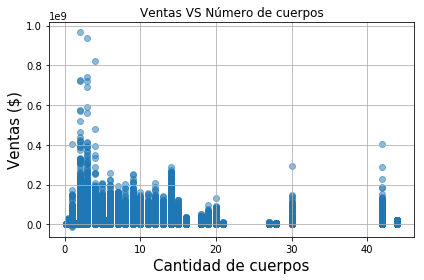

In [42]:
a = final_data['CUERPOS FINALES']
b = final_data['VentaSinIva']

fig, ax = plt.subplots()

ax.scatter(a, b, alpha=0.5)
ax.set_xlabel(r'Cantidad de cuerpos', fontsize=15)
ax.set_ylabel(r'Ventas ($)', fontsize=15)
ax.set_title('Ventas VS Número de cuerpos')    
ax.grid(True)
fig.tight_layout()
plt.show()

- DISTRIBUCIÓN DE VENTAS EN UNIDADES

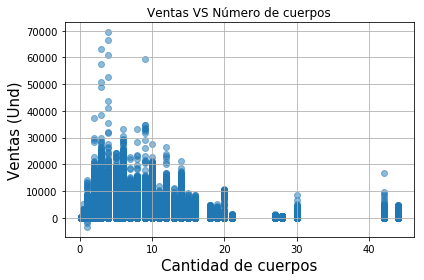

In [43]:
a2 = final_data['CUERPOS FINALES']
b2 = final_data['Vta_Und']

fig, ax = plt.subplots()

ax.scatter(a2, b2, alpha=0.5)
ax.set_xlabel(r'Cantidad de cuerpos', fontsize=15)
ax.set_ylabel(r'Ventas (Und)', fontsize=15)
ax.set_title('Ventas VS Número de cuerpos')    
ax.grid(True)
fig.tight_layout()
plt.show()

**DEFINICIÓN DE LAS FUNCIONES DE VENTA Y LOS ERRORES CUADRÁTICOS**

In [44]:
#FUNCIÓN DE VENTAS (PESOS) Y EL ERROR CUADRÁTICO 
def sales(a,x):
    
    return a[0]*(1-np.exp(-a[1]*x))

def q_err(a,x,y):
    
     return sum((sales(a,x) - y)**2)
    
    
x = final_data['CUERPOS FINALES']
y = final_data['VentaSinIva']
x0 = [1,1]
#OPTIMIZAMOS EL ERROR CUADRÁTICO EN FUNCION DE LAS VENTAS EN PESOS 
sol = minimize(q_err, x0, args=(x, y))
print(sol)

      fun: 8.852850790905248e+19
 hess_inv: array([[ 2.20722106e-08, -7.34075272e-12],
       [-7.34489274e-14, -9.82183624e-18]])
      jac: array([ 0.00000000e+00, -2.65917987e+17])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 93
      nit: 2
     njev: 19
   status: 2
  success: False
        x: array([2.98935175e+06, 4.50458371e-01])


In [45]:
#FUNCIÓN DE VENTAS (UND) Y ERROR CUADRÁTICO 
def sales_2(a,x):
    
    return a[0]*(1-np.exp(-a[1]*x))

def q_err_2(a,x,y):
    
     return sum((sales_2(a,x) - y)**2)
    
    
x_1 = final_data['CUERPOS FINALES']
y_1 = final_data['Vta_Und']
x_0 = [0.5,0.5]

#OPTIMIZAMOS EL ERROR CUADRÁTICO EN FUNCIÓN DE LA VENTA EN UNIDADES
sol_1 = minimize(q_err_2, x_0, args=(x_1, y_1), method='BFGS')
print(sol_1)

      fun: 1522106362000.0195
 hess_inv: array([[ 1.03956780e-16, -5.29415841e-17],
       [-5.29415841e-17,  2.71776830e-17]])
      jac: array([-2.25771520e+07,  1.55762688e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 22
     njev: 169
   status: 2
  success: False
        x: array([6.04268658e+02, 3.05651852e-01])


**CONTRASTE DE LAS CURVAS DE VENTA**

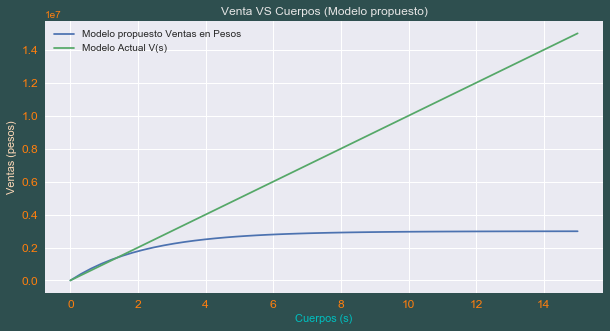

In [49]:
#LLAMO A LOS PARÁMETROS OPTIMOS ENCONTRADOS EN LA MINIMIZACIÓN DE LOS ERRORES CUADRÁTICOS
c = sol.x[0]
a = sol.x[1]
c_1 = sol_1.x[0]
a_1 = sol_1.x[1]

#DEFINO UN ESPACIO PARA EL EJE X Y ESTABLEZCO LAS FUNCIONES DE VENTA QUE SE VAN A GRAFICAR
x1 = np.linspace(0,15)           #ESPACIO DEFINIDO HASTA 15 PARA FACILITAR LA VISUALIZACIÓN (ESTO REPRESENTA LOS NÚMEROS DE CUERPOS)
y1 = c*(1-np.exp(-a*x1))         #FUNCIÓN DE VENTAS EN PESOS
y_2 = x1*1000000                #FUNCION DE VENTAS DEL MODELO ACTUAL DE LA COMPAÑÍA
y_3 = c_1*(1-np.exp(-a_1*x1))   #FUNCIÓN DE VENTAS EN UNIDADES

#FUNCIÓN PARA GRÁFICAR 
def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(10, 5), facecolor=(.18, .31, .31))

    ax.set_title('Venta VS Cuerpos (Modelo propuesto)'.format(sty), color='0.9')
    ax.set_xlabel('Cuerpos (s)'.format(sty), color='c')
    ax.set_ylabel('Ventas (pesos)'.format(sty), color='peachpuff')
    ax.plot(x1, y1, label='Modelo propuesto Ventas en Pesos')
    ax.plot(x1, y_2, label = 'Modelo Actual V(s)')
    #ax.plot(x1, y_3, label= 'Modelo Propuesto Ventas en Unidades')
    ax.tick_params(labelcolor='tab:orange', labelsize='large')
    ax.legend()
    
demo('seaborn')

**CURVAS DE ELASTICIDAD**

C:\Users\jmcastellanos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



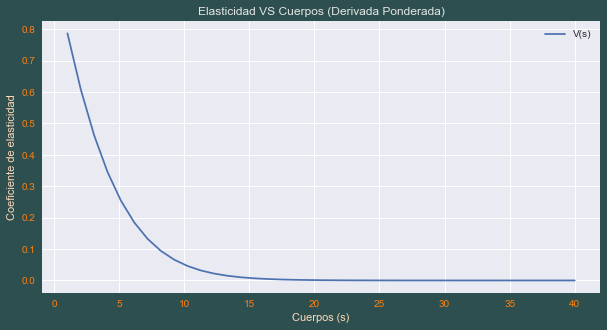

In [54]:
x2 = np.linspace(0,40, 40)
y = (a*x2)/(np.exp(a*x2)-1)

def demo_2(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(10, 5), facecolor=(.18, .31, .31))

    ax.set_title('Elasticidad VS Cuerpos (Derivada Ponderada)'.format(sty), color='0.9')
    ax.set_xlabel('Cuerpos (s)'.format(sty), color='peachpuff')
    ax.set_ylabel('Coeficiente de elasticidad'.format(sty), color='peachpuff')
    ax.plot(x2, y, label='V(s)')
    ax.tick_params(labelcolor='tab:orange')
    ax.legend()
    
demo_2('seaborn')

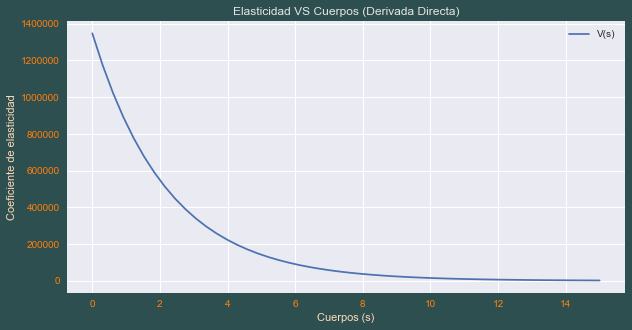

In [53]:
y4 = c*a*(np.exp(-a*x1))

def demo_3(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(10, 5), facecolor=(.18, .31, .31))

    ax.set_title('Elasticidad VS Cuerpos (Derivada Directa)'.format(sty), color='0.9')
    ax.set_xlabel('Cuerpos (s)'.format(sty), color='peachpuff')
    ax.set_ylabel('Coeficiente de elasticidad'.format(sty), color='peachpuff')
    ax.plot(x1, y4, label='V(s)')
    ax.tick_params(labelcolor='tab:orange')
    ax.legend()
    
demo_3('seaborn')